In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import math
%matplotlib inline

In [2]:
#import dataset
df = pd.read_csv('salary.csv')
df

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.00000,0,0,0,1.17,1,0,1,1,3,0
1,58000.00000,1,0,0,1.24,1,0,1,1,2,0
2,45500.00000,0,0,0,1.21,1,0,1,1,3,2
3,35782.00000,0,2,1,0.99,1,0,1,1,4,1
4,34731.00000,0,2,2,0.91,1,0,1,1,4,1
5,56000.00000,1,0,0,1.19,1,0,1,1,1,0
6,61008.00000,0,2,2,1.33,1,0,1,1,2,0
7,39986.00000,0,2,0,0.99,1,0,1,1,4,0
8,36308.00000,0,2,1,0.85,1,0,1,1,1,1
9,55000.00000,0,0,0,1.23,1,0,1,1,1,1


In [3]:
df.info() #to get info about our dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.2 KB


In [4]:
df.head() # the first five rows of the dataframe

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [5]:
df.tail() # the last 5 five rows of the dataframe

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
509,45906.0,6,17,11,0.92,1,0,2,0,2,70
510,60402.0,6,19,7,0.86,1,0,3,0,1,72
511,53187.0,19,7,6,0.78,1,0,3,0,4,76
512,56542.0,8,20,10,0.78,1,0,3,0,2,78
513,52662.0,13,25,11,0.78,1,0,3,0,1,112


In [6]:
df_salary = df.dropna()
#dropping the missing values

In [7]:
df_salary.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,50863.220098,2.931774,12.836257,7.046784,0.948558,0.964912,0.044834,2.130604,0.750487,2.526316,6.994152
std,12685.132358,4.794327,9.447040,6.419708,0.149524,0.184181,0.207142,0.819977,0.433153,1.126644,16.887552
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,1.000000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


In [8]:
df_salary.var()
#finding the variance

salary         1.609126e+08
exprior        2.298557e+01
yearsworked    8.924657e+01
yearsrank      4.121265e+01
market         2.235729e-02
degree         3.392270e-02
otherqual      4.290783e-02
position       6.723623e-01
male           1.876218e-01
Field          1.269326e+00
yearsabs       2.851894e+02
dtype: float64

In [9]:
df_salary.corr().sum()
# finding the correlation b

salary         3.467928
exprior        1.239070
yearsworked    2.924984
yearsrank      2.837608
market         1.109720
degree         0.886783
otherqual      1.288882
position       3.298113
male           1.748159
Field         -0.897299
yearsabs       0.408186
dtype: float64

## Test, Train and Split

In [10]:
                                                                                                 

X = df_salary[['exprior', 'yearsworked', 'yearsrank', 'market', 'degree', 'otherqual', 'position', 'male', 'Field', 'yearsabs']]
Y = df_salary[['salary']]
len(X), len(Y)

(513, 513)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
model = LinearRegression()
results = model.fit(X_train, Y_train)

print(X_train.shape)
print(X_test.shape)

(359, 10)
(154, 10)


In [12]:
print(model.coef_)

[[ 1.95167658e+02 -7.40632194e+01  8.15530220e+02  3.24963114e+04
   4.35195523e+02  3.80408795e+03  7.26505098e+03  8.35536401e+02
  -1.71242420e+03 -1.83237658e+01]]


In [13]:
print(model.intercept_)

[2408.52012547]


In [14]:
# fit a OLS model with intercept 
X = sm.add_constant(X)
model = smf.OLS(Y_train,X_train).fit()
predictions = model.predict(X_train)

model.summary()

/home/johanna/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     3323.
Date:                Thu, 23 May 2019   Prob (F-statistic):               0.00
Time:                        16:19:33   Log-Likelihood:                -3594.7
No. Observations:                 359   AIC:                             7209.
Df Residuals:                     349   BIC:                             7248.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
exprior       199.9250     89.280      2.239      0.026      24.330     375.519
yearsworked   -71.9079    104.844     -0.686      0.493    -278.113     134.297
yearsrank     818.6500     95.318      8.589      0.000     631.180    1006.120
market       3.378e+04   1407.807     23.995      0.000     3.1e+04    3.65e+04
degree       1047.9541   1311.940      0.799      0.425   -1532.348    3628.257
otherqual    3903.0344   1388.639      2.811      0.005    1171.880    6634.189
position     7345.9314    752.019      9.768      0.000    5866.872    8824.991
male          845.4411    995.398      0.849      0.396   -1112.293    2803.175
Field       -1586.6522    245.589     -6.461      0.000   -2069.673   -1103.631
yearsabs      -16.4755     23.841     -0.691      0.490     -63.365      30.414
==============================================================================
Omnibus:                       14.648   Durbin-Watson:                   2.192
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.656
Skew:                           0.324   Prob(JB):                     3.27e-05
Kurtosis:                       3.980   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
Y_predict = model.predict(X_test)
Y_predict

305    50524.785059
497    52463.772160
440    39632.432201
153    50785.386020
499    37915.906403
131    38361.733491
204    50304.499962
508    50017.662980
326    60364.915708
248    71604.493098
362    67397.737837
353    62388.842734
290    60359.988409
84     45164.695288
10     51426.694448
325    56158.100209
78     49661.355760
30     42195.032283
184    56159.473087
195    51036.327243
223    71136.841494
210    60917.870920
282    52622.077473
209    67574.171017
124    38091.902078
251    59392.013162
76     37695.593169
381    64261.102633
343    67792.360390
324    49249.034487
           ...     
396    36367.482620
19     37286.527693
501    51022.311024
341    62638.738951
56     33410.728368
279    72087.205536
485    47295.539488
434    40607.502652
154    47580.118217
25     34843.489933
266    35476.094747
42     37160.408703
313    71766.559710
411    28318.224667
455    41251.938268
285    46533.854734
126    41711.939296
335    46383.509710
31     37019.849565


In [16]:
model_mse = mean_squared_error(Y_predict, Y_test)
model_mse

35817688.10847761

In [17]:
# print the p-values for the model coefficients 

model.pvalues

exprior        2.576565e-02
yearsworked    4.932577e-01
yearsrank      2.968137e-16
market         7.625759e-76
degree         4.249599e-01
otherqual      5.222515e-03
position       4.396104e-20
male           3.962690e-01
Field          3.506100e-10
yearsabs       4.899810e-01
dtype: float64

In [18]:
# print the rsqaured for the model in statsmodel

model.rsquared

0.9896058435295638

In [19]:
# statsmodel, the confidence intervals for the model coefficients
print(model.conf_int())

                        0             1
exprior         24.330477    375.519477
yearsworked   -278.112929    134.297040
yearsrank      631.180444   1006.119602
market       31011.852931  36549.559498
degree       -1532.348457   3628.256641
otherqual     1171.880115   6634.188742
position      5866.871640   8824.991151
male         -1112.292674   2803.174875
Field        -2069.672888  -1103.631465
yearsabs       -63.364705     30.413733


In [20]:
math.sqrt(model_mse)

5984.7880587768195

## Questions and Answers

Q1: Create scatterplots, histograms, and a descriptive statistics table of the variables of interest.

A:

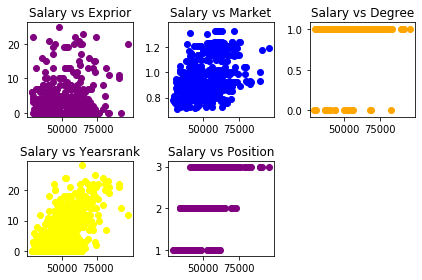

In [21]:
plt.subplot(2,3,1)
plt.scatter(df_salary['salary'], df_salary['exprior'], c='purple')
plt.title('Salary vs Exprior')

plt.subplot(2,3,2)
plt.scatter(df_salary['salary'], df_salary['market'], c='blue')
plt.title('Salary vs Market')


plt.subplot(2,3,3)
plt.scatter(df_salary['salary'], df_salary['degree'], c='orange')
plt.title('Salary vs Degree')

plt.subplot(2,3,4)
plt.scatter(df_salary['salary'], df_salary['yearsrank'], c='yellow')
plt.title('Salary vs Yearsrank')

plt.subplot(2,3,5)
plt.scatter(df_salary['salary'], df_salary['position'], c='purple')
plt.title('Salary vs Position')

plt.tight_layout()
plt.show()

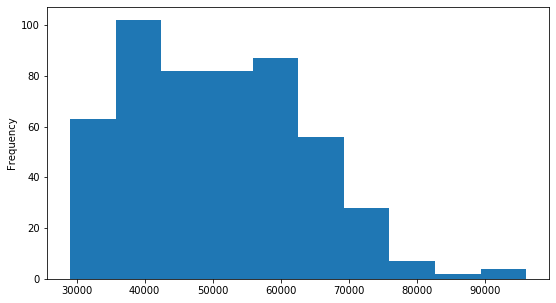

In [22]:
plt.figure(figsize=(9, 5))
df_salary['salary'].plot(kind='hist')

In [23]:
df_salary.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,50863.220098,2.931774,12.836257,7.046784,0.948558,0.964912,0.044834,2.130604,0.750487,2.526316,6.994152
std,12685.132358,4.794327,9.447040,6.419708,0.149524,0.184181,0.207142,0.819977,0.433153,1.126644,16.887552
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,1.000000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


Q2: One-hot encode the variable Field into three dummy variables, using HR as the reference category. You can use pandas' get_dummies() function for this.

A:

In [24]:
df_salary['Field'].value_counts() 
# number 3 represents the HR category

4    135
3    126
2    126
1    126
Name: Field, dtype: int64

In [25]:
pd.get_dummies(df_salary['Field'].head())

,2,3,4
0,0,1,0
1,1,0,0
2,0,1,0
3,0,0,1
4,0,0,1


Q3: Produce a correlation matrix comparing the relationship of salary to the predictor variables. Is there any multicollinearity or other problems that may be a problem in the multiple regression?

In [26]:
df_salary.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,-0.099077,0.029447
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.076202,-0.017792
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,-0.292313,0.030521
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.130599,-0.622058
Field,-0.499316,-0.046854,-0.264208,-0.265620,-0.223887,-0.099077,-0.076202,-0.292313,-0.130599,1.000000,0.000778


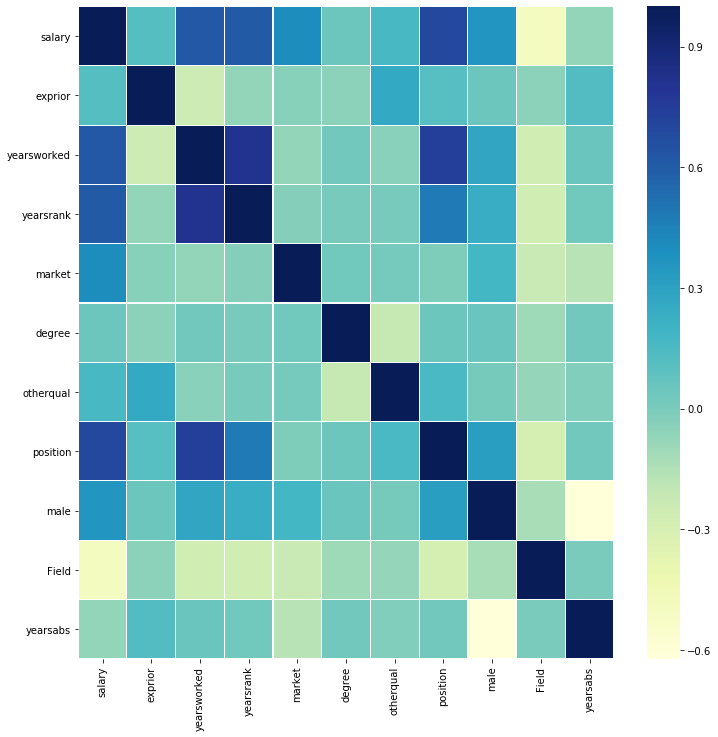

In [27]:
corrmat = df_salary.corr() 
  
f, ax = plt.subplots(figsize =(12, 12)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 


There is no multicollinearity nor other problems in the multiple regression

Q4: Run the multiple linear regression and interpret the standardised coefficients given in the statsmodels output. What are the most important features when predicting employee salary?

In [28]:
model.params

exprior          199.924977
yearsworked      -71.907944
yearsrank        818.650023
market         33780.706214
degree          1047.954092
otherqual       3903.034429
position        7345.931395
male             845.441100
Field          -1586.652176
yearsabs         -16.475486
dtype: float64

A: The most important features when predicting employee salary are the: 
1. The market value
2. Tthe position of which the employee hold(whether they are a junior/senior executive)
3. Their qualifications(i.e degree) and other equaivalent attributes or talents
4. The number of years they have been in that rank
5. Their gender

Q5: Calculate the standardised residuals (resid()) and standardised predicted values (fittedvalues()).

A:

In [29]:
model.resid.head()

421     7136.727537
94     -2524.429689
312     2192.882426
407      491.604474
23     12642.674533
dtype: float64

In [30]:
model.fittedvalues.head()

421    33219.272463
94     42989.429689
312    54999.117574
407    34508.395526
23     49416.325467
dtype: float64

Q6: Plot the residuals versus the predicted values using seaborn's residplot with fitted values as the x parameter, and the dependent variable as y. lowess=True.

* Are there any problems with the regression?


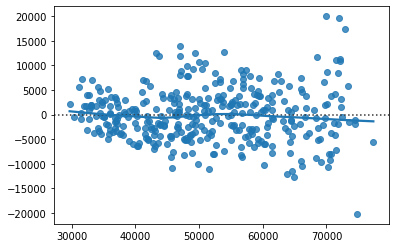

In [31]:
sns.residplot(model.fittedvalues, model.resid, lowess=True)

A: There is no problem with the regression, instead  the resiual plot shows a fairly random pattern which  indicates that a linear model provides a decent fit to the data. 

Now run your model on the test set.

In [32]:
#prediction values using test set
y_pred = model.predict(X_test)
print(y_pred)

305    50524.785059
497    52463.772160
440    39632.432201
153    50785.386020
499    37915.906403
131    38361.733491
204    50304.499962
508    50017.662980
326    60364.915708
248    71604.493098
362    67397.737837
353    62388.842734
290    60359.988409
84     45164.695288
10     51426.694448
325    56158.100209
78     49661.355760
30     42195.032283
184    56159.473087
195    51036.327243
223    71136.841494
210    60917.870920
282    52622.077473
209    67574.171017
124    38091.902078
251    59392.013162
76     37695.593169
381    64261.102633
343    67792.360390
324    49249.034487
           ...     
396    36367.482620
19     37286.527693
501    51022.311024
341    62638.738951
56     33410.728368
279    72087.205536
485    47295.539488
434    40607.502652
154    47580.118217
25     34843.489933
266    35476.094747
42     37160.408703
313    71766.559710
411    28318.224667
455    41251.938268
285    46533.854734
126    41711.939296
335    46383.509710
31     37019.849565


Q7: How does your model compare when running it on the test set - what is the difference in the Root Mean Square Error (RMSE) between the training and test sets?

In [33]:
#root mean squared error:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

rmse_test = np.sqrt(mean_squared_error(Y_test, y_pred_test))
rmse_train = np.sqrt(mean_squared_error(Y_train, y_pred_train))

print("Root Mean Squared Error of Training Set: {}".format(rmse_train))
print("Root Mean Squared Error of Testing Set: {}".format(rmse_test))

Root Mean Squared Error of Training Set: 5399.363990757033
Root Mean Squared Error of Testing Set: 5984.7880587768195


A: There is a difference of −585.42406802